In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(50,activation = 'relu'),
    Dense(30,activation = 'relu'),
    Dense(10,activation = 'softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
model.fit(x_train, y_train, epochs = 15, validation_data = (x_test,y_test), verbose = 1)

In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"{test_acc*100:.2f}%")
prediction = model.predict(x_test[:10])
predict_labels = np.argmax(prediction,axis = 1)
actual = y_test[:10].flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4883 - loss: 1.4584
48.25%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


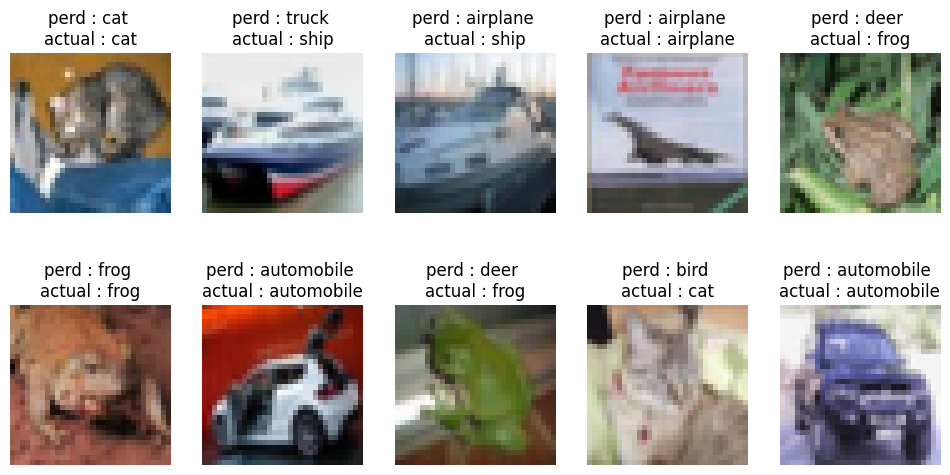

In [9]:
plt.figure(figsize = (12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    pred_name = class_names[predict_labels[i]]
    actual_name = class_names[actual[i]]

    plt.title(f"perd : {pred_name} \nactual : {actual_name}")
    plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

    airplane       0.47      0.64      0.54      1000
  automobile       0.61      0.59      0.60      1000
        bird       0.34      0.40      0.37      1000
         cat       0.38      0.25      0.30      1000
        deer       0.44      0.38      0.41      1000
         dog       0.44      0.35      0.39      1000
        frog       0.50      0.57      0.53      1000
       horse       0.54      0.56      0.55      1000
        ship       0.71      0.46      0.56      1000
       truck       0.46      0.64      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



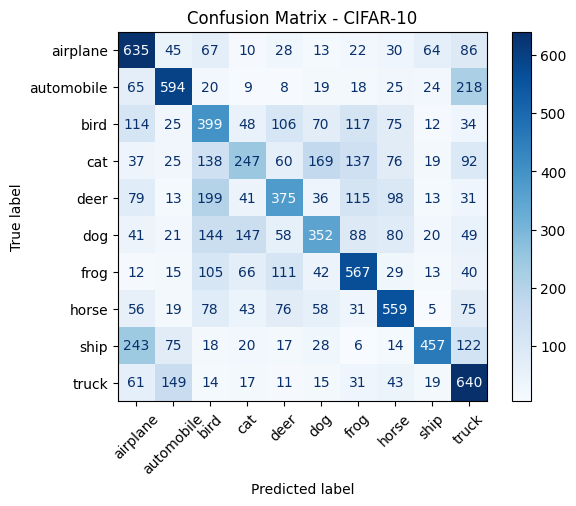

In [10]:
y_true = y_test.ravel()
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title("Confusion Matrix - CIFAR-10")
plt.show()